## Step 1: Reading and Understanding the Data

In [210]:
import warnings
warnings.filterwarnings('ignore')

In [211]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing LinearRegression

from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 200)


In [212]:
from scipy.stats import skew,norm

In [213]:
# Importing dataset

housing = pd.read_csv('train.csv', encoding = 'latin')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [214]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [215]:
housing.shape

(1460, 81)

In [216]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


It is evident that most of the columns show outlier. We will further analyse it while treating outliers.

In [217]:
# check the missing values
print ('Total missing values in the dataset', sum(housing.isna().sum()))


Total missing values in the dataset 6965


In [218]:
# Looking at NaN % within the data
# if NaN % in under 20% keep it else remove it
nan = pd.DataFrame(housing.isna().sum(), columns = ['Total Missing Values'])
nan['Variable'] = nan.index
nan['Perc(%)'] = (nan['Total Missing Values']/1460)*100
nan = nan[nan['Total Missing Values'] > 0]
nan = nan.sort_values(by = ['Total Missing Values'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Remove', 'Keep')
nan

,Total Missing Values,Variable,Perc(%),Usability
Electrical,1,Electrical,0.068493,Keep
MasVnrType,8,MasVnrType,0.547945,Keep
MasVnrArea,8,MasVnrArea,0.547945,Keep
BsmtQual,37,BsmtQual,2.534247,Keep
BsmtCond,37,BsmtCond,2.534247,Keep
BsmtFinType1,37,BsmtFinType1,2.534247,Keep
BsmtExposure,38,BsmtExposure,2.602740,Keep
BsmtFinType2,38,BsmtFinType2,2.602740,Keep
GarageCond,81,GarageCond,5.547945,Keep
GarageQual,81,GarageQual,5.547945,Keep


In [219]:
#Checking for value counts
for i in housing:
    print(i,':\n',housing[i].value_counts(dropna=False),sep='',end='\n--------------------------\n\n')

Id:
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
--------------------------

MSSubClass:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
--------------------------

MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------

LotFrontage:
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
24.0      19
68.0      19
73.0      18
79.0      17
63.0      17
55.0      17
72.0      17
100.0     16
66.0      15
51.0      15
74.0      15
52.0      14
59.0      13
57.0      12
43.0      12
40.0      12
82.0      12
71.0      12
67.0      12
76.0      11
69.0     

BsmtFinSF1:
0       467
24       12
16        9
20        5
686       5
       ... 
535       1
534       1
532       1
522       1
2096      1
Name: BsmtFinSF1, Length: 637, dtype: int64
--------------------------

BsmtFinType2:
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
--------------------------

BsmtFinSF2:
0       1293
180        5
374        3
117        2
391        2
468        2
469        2
480        2
294        2
290        2
287        2
279        2
539        2
551        2
712        2
147        2
182        2
96         2
41         2
93         2
64         2
906        1
499        1
547        1
546        1
544        1
532        1
531        1
506        1
1061       1
1063       1
1080       1
500        1
492        1
495        1
872        1
491        1
486        1
479        1
472        1
1085       1
1120       1
466        1
465        1
1127       1
441        1
438        1
10

After going through the value count of different columns and referring back to the data description we got the idea that most of the columns are having 'NA' as a subcategory which is wrongly classfied as 'NAN'values.
So we will fill it with necessary replacements.

In [220]:
housing.Alley.fillna('No_Alley',inplace=True)

In [221]:
housing.PoolQC.fillna('No_Pool',inplace=True)

In [222]:
housing.Fence.fillna('No_Fence',inplace=True)

In [223]:
housing.MiscFeature.fillna('None',inplace=True)

In [224]:
housing.BsmtQual.fillna('No_Basement',inplace=True)

In [225]:
housing.BsmtCond.fillna('No_Basement',inplace=True)

In [226]:
housing.BsmtExposure.fillna('No_Basement',inplace=True)

In [227]:
housing.BsmtFinType1.fillna('No_Basement',inplace=True)

In [228]:
housing.BsmtFinType2.fillna('No_Basement',inplace=True)

In [229]:
housing.FireplaceQu.fillna('No_Fireplace',inplace=True)

In [230]:
housing.GarageType.fillna('No_Garage',inplace=True)

In [231]:
housing.GarageFinish.fillna('No_Garage',inplace=True)
housing.GarageQual.fillna('No_Garage',inplace=True)
housing.GarageCond.fillna('No_Garage',inplace=True)

In [232]:
housing.MasVnrType.fillna('None',inplace=True)

## Step 2: Data Cleaning

In [233]:
#Checking for rest of null columns
round(housing.isnull().sum()/len(housing.index),2)[round(housing.isnull().sum()/
                                                                 len(housing.index),2).values>0.00]

LotFrontage    0.18
MasVnrArea     0.01
GarageYrBlt    0.06
dtype: float64

In [234]:
#we will try to convert the Year columns with the age where we are going to fill these columns with number
housing['YearBuilt_Old'] = housing.YearBuilt.max()-housing.YearBuilt
housing['YearRemodAdd_Old'] = housing.YearRemodAdd.max()-housing.YearRemodAdd
housing['GarageYrBlt_Old'] = housing.GarageYrBlt.max()-housing.GarageYrBlt
housing['YrSold_Old'] = housing.YrSold.max()-housing.YrSold
housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1018,1991,1992,1991.0,2007,19,18,19.0,3
946,1959,1959,1959.0,2006,51,51,51.0,4
597,2006,2007,2006.0,2007,4,3,4.0,3
575,1947,1950,1947.0,2008,63,60,63.0,2
516,1972,1972,1972.0,2009,38,38,38.0,1
191,1972,2004,1972.0,2007,38,6,38.0,3
443,2006,2007,2007.0,2007,4,3,3.0,3
987,2009,2010,2010.0,2010,1,0,0.0,0
542,1998,1999,1998.0,2009,12,11,12.0,1
801,1916,1990,1957.0,2007,94,20,53.0,3


In [235]:
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','LotFrontage'],axis='columns')

In [236]:
#we removed LotFrontage as it is not that important for our analysis

In [237]:
# Data Imputation
housing.MasVnrArea.fillna(housing.MasVnrArea.median(),inplace=True)
housing.GarageYrBlt_Old.fillna(housing.GarageYrBlt_Old.median(),inplace=True)


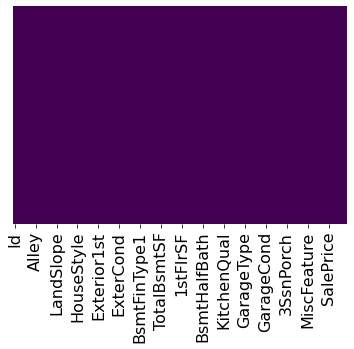

In [238]:
#Rechecking the Null values present in the dataset after imputation 
sns.heatmap(housing.isnull(),yticklabels= False, cbar = False, cmap='viridis')

In [239]:
housing.Electrical.fillna('SBrkr',inplace=True)

In [240]:
housing.shape

(1460, 80)

In [241]:
#Observing target variable
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It is visible that most of the houses are priced around $180921.

In [242]:
#Checking for skewness and kurtosis
print("Skewness is %f" % housing['SalePrice'].skew())
print("Kurtosis is %f" % housing['SalePrice'].kurt())

Skewness is 1.882876
Kurtosis is 6.536282


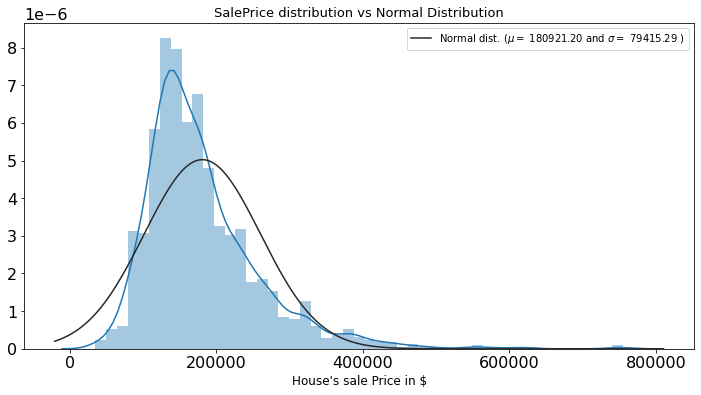

In [243]:
# Visualize the distribution of target variable
(mu, sigma) = norm.fit(housing['SalePrice'])
plt.figure(figsize = (12,6))
sns.distplot(housing['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

From above we can see that data is not normally distributed. Instead it is right skewed. We will handle this issue by log transformation.

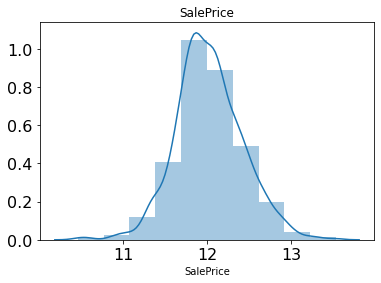

In [244]:
# SalePrice after transformation
# Visualise the target variable -> SalePrice after transforming the sales price

housing['SalePrice'] = np.log1p(housing['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

The skewness has been removed, the curve is a normal distribution now.

In [245]:
#Let's Check correlations among different variables

In [246]:
numeric_cols = housing.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('The Most Correlated Features with SalePrice:'), print (corr['SalePrice'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with SalePrice:'), print (corr['SalePrice'].sort_values(ascending = False)[-5:])

The Most Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
TotRmsAbvGrd    0.534422
Fireplaces      0.489450
Name: SalePrice, dtype: float64 

The Most Uncorrelated Features with SalePrice:
KitchenAbvGr       -0.147548
EnclosedPorch      -0.149050
GarageYrBlt_Old    -0.495794
YearRemodAdd_Old   -0.565608
YearBuilt_Old      -0.586570
Name: SalePrice, dtype: float64


(None, None)

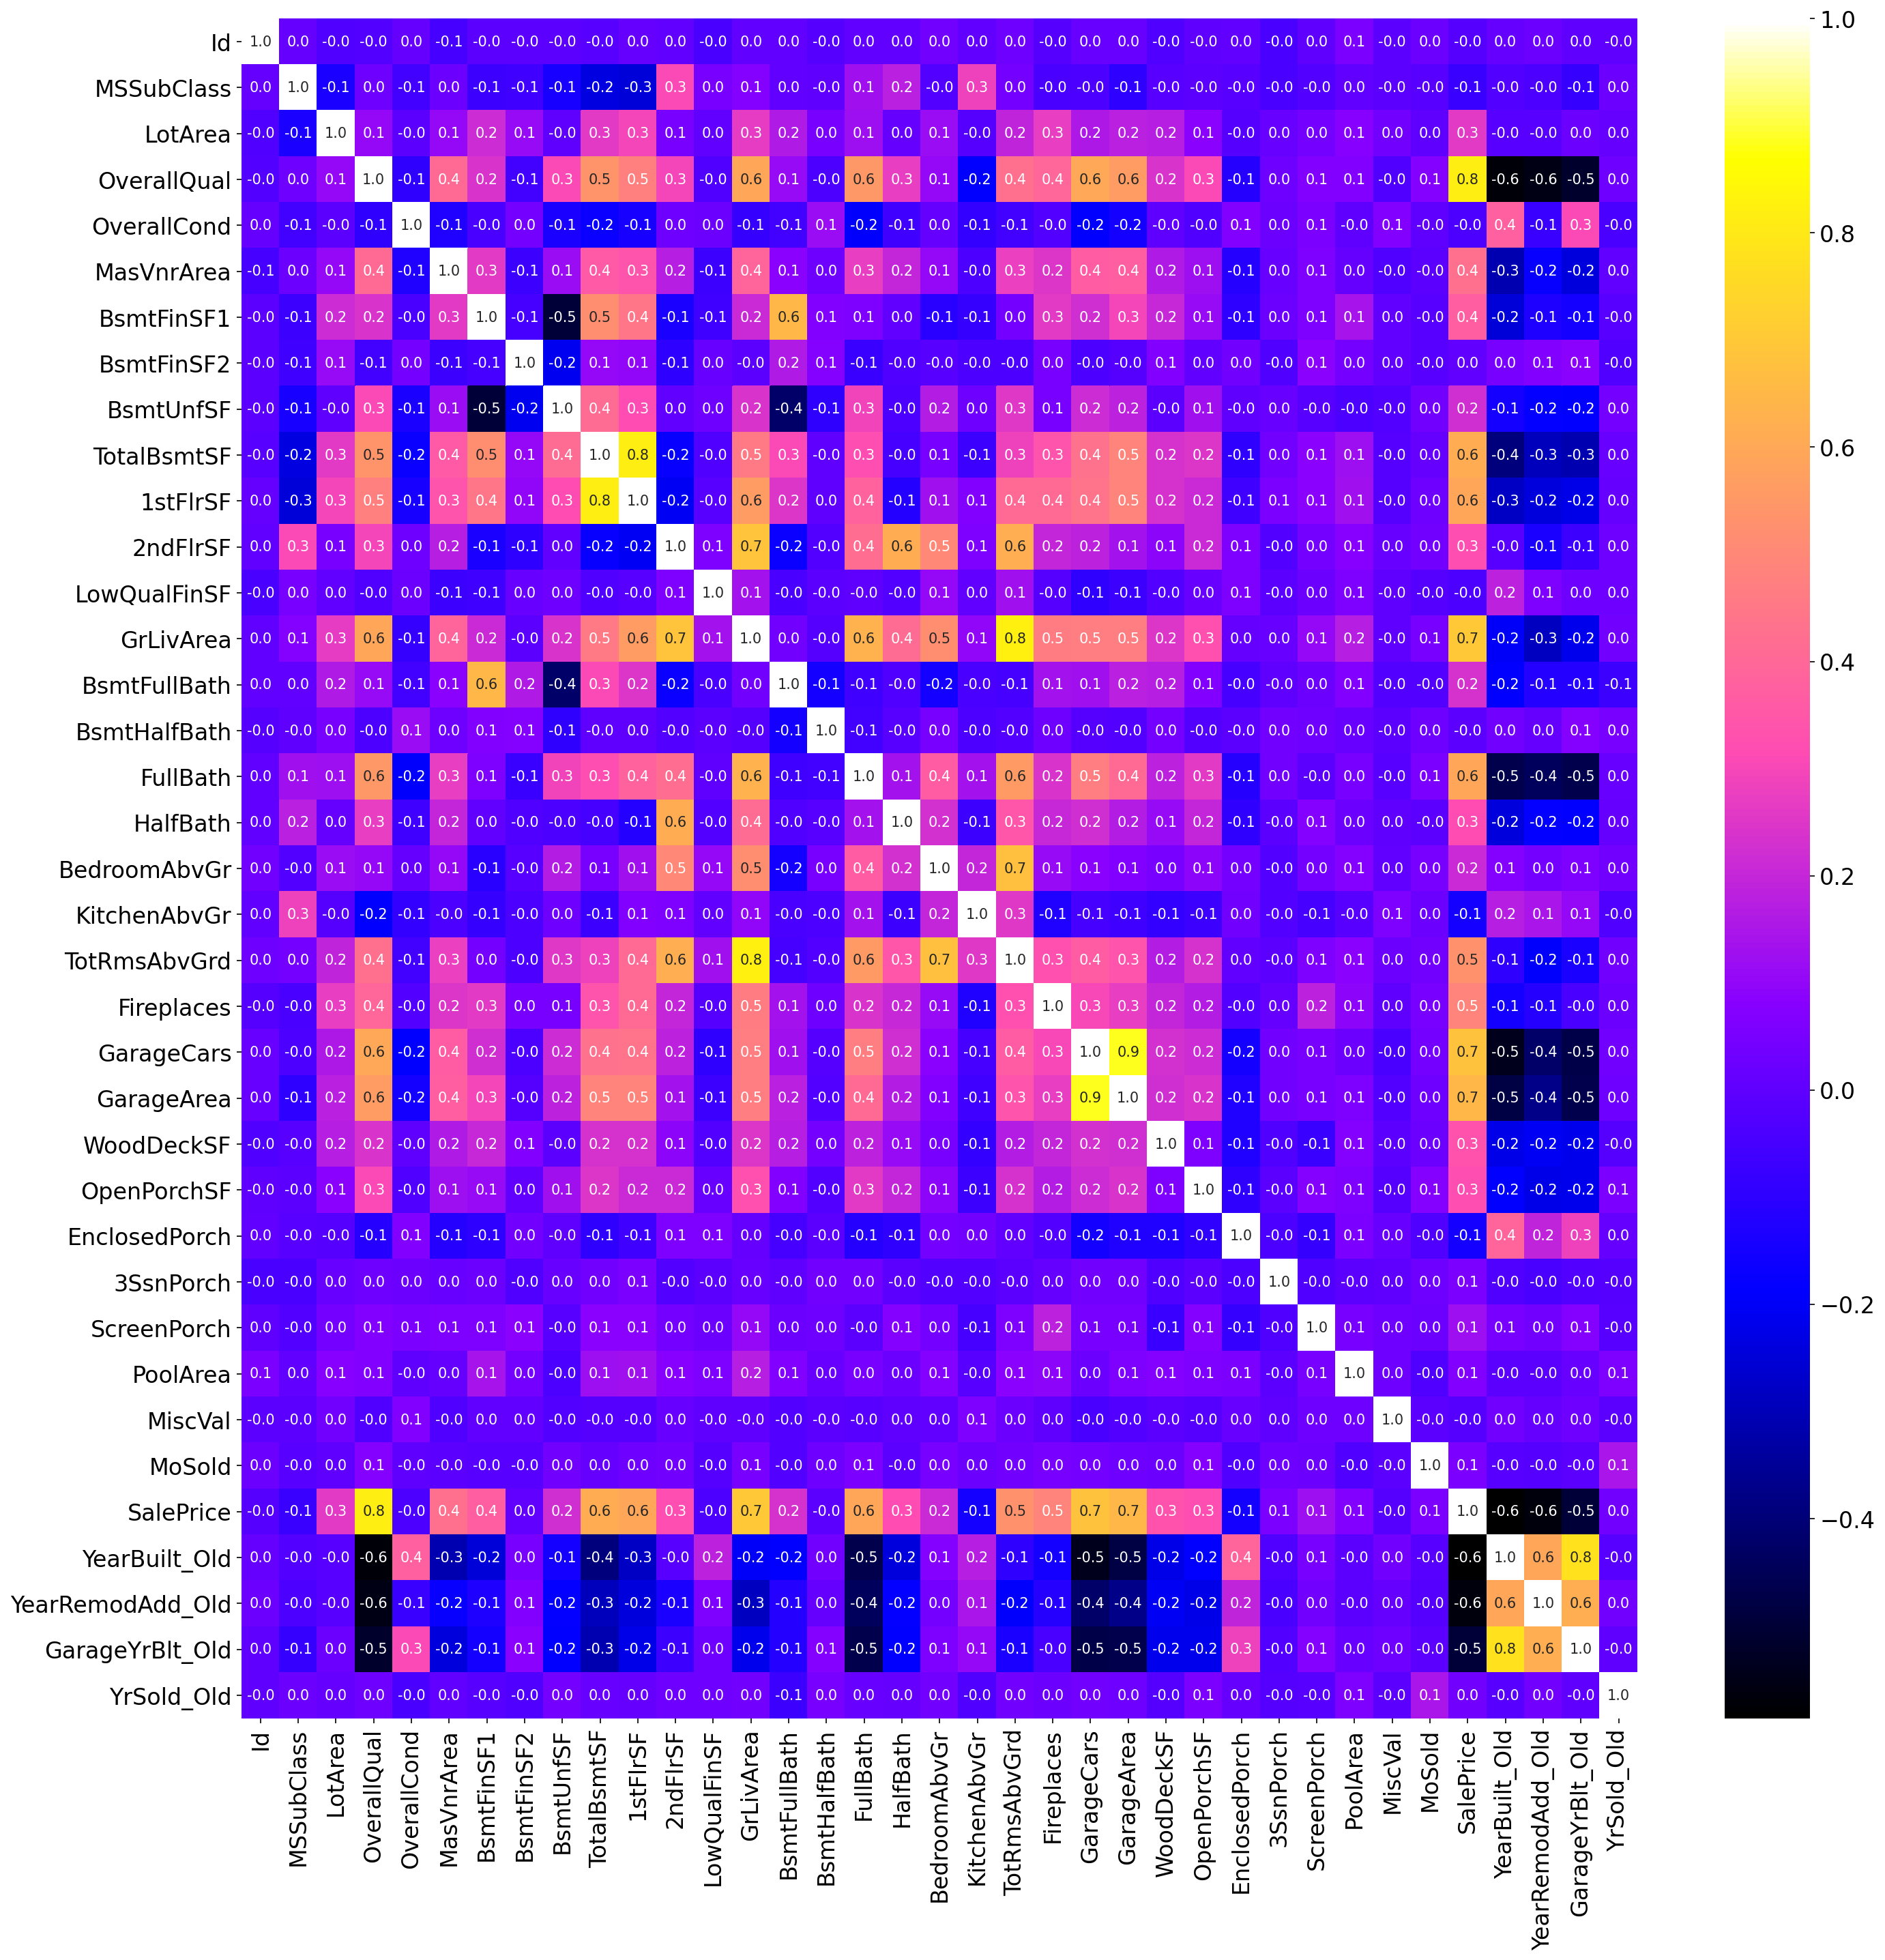

In [247]:
fig = plt.figure(figsize=(22,22),dpi=150)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
sns.heatmap(housing.corr(), annot = True, cmap='gnuplot2',fmt='.1f')
plt.show()

Observations:-
-As above we saw highly correlated variables with the target variable like OverallQual,GrLivArea etc we re also observing few other collinearity 
     TotRmsAbvGrd and GrLivArea show 82%
     Garage Area and Garage Cars show 90%
     TotalBsmtSF and 1stFlrSF shows 80%.   
Let's speculate some more.

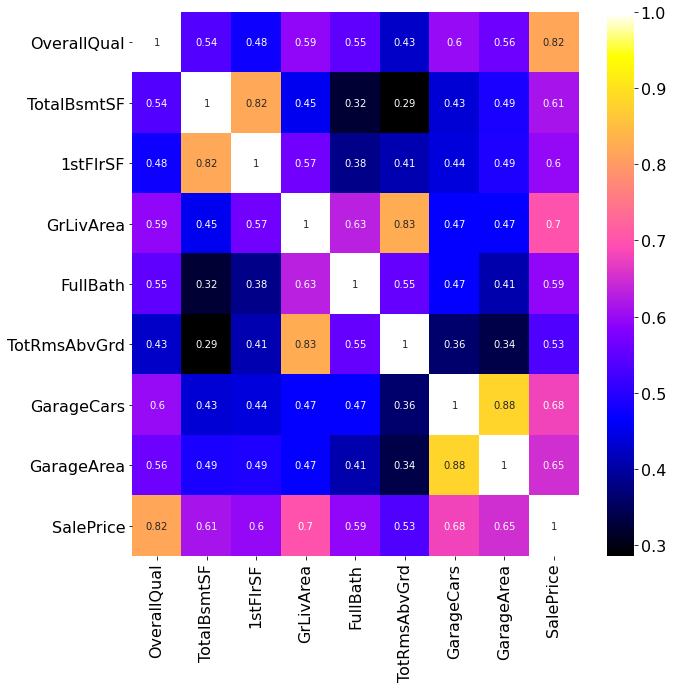

In [248]:
cor=housing.corr()
high_cor=cor.index[cor["SalePrice"]>.5]
plt.figure(figsize=(10,10))
sns.heatmap(housing[high_cor].corr(),annot=True,cmap='gnuplot2')

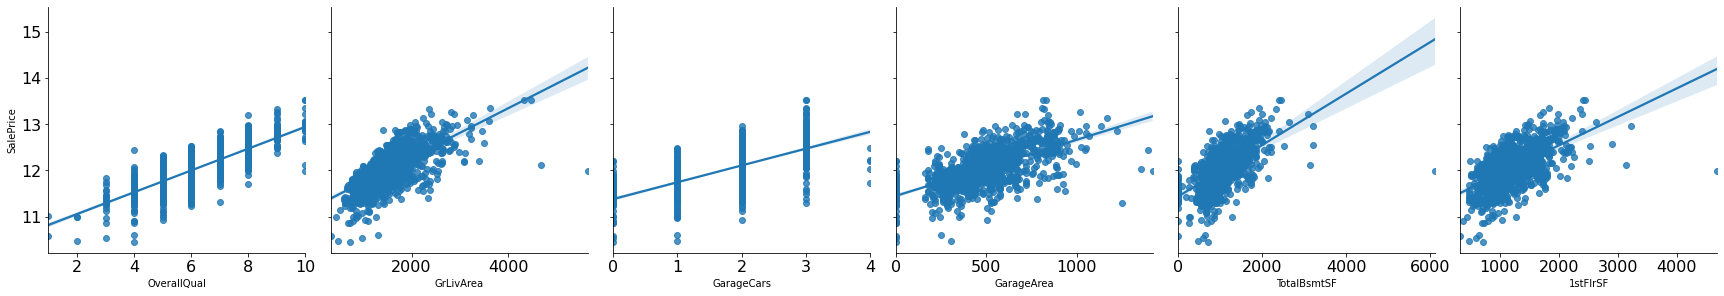

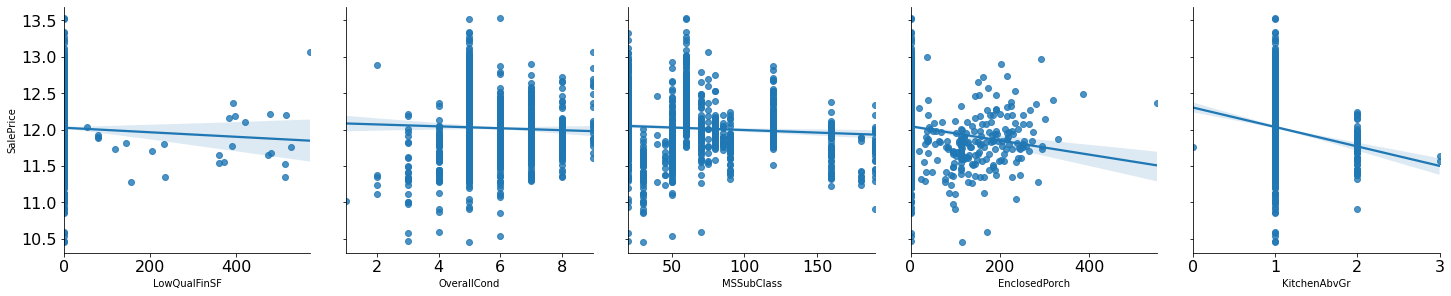

In [249]:
#Let's visualize more of these correlated variable with the target variable
high_cor_feature = sns.PairGrid(housing, y_vars=["SalePrice"], x_vars=["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"], height=4)
high_cor_feature.map(sns.regplot)

low_cor_feature = sns.PairGrid(housing, y_vars=["SalePrice"], x_vars=["LowQualFinSF","OverallCond","MSSubClass","EnclosedPorch","KitchenAbvGr"], height=4)
low_cor_feature.map(sns.regplot)

Observation :
High correlation features draw a possitive regression line with saleprice or target.

Low correlation features draw a negative regression line with saleprice or target.

In [250]:
# Removing the highly correlated variables

housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [251]:
#Some feature analysis

In [252]:
print (housing[['OverallQual', 'SalePrice']].groupby(['OverallQual'], as_index=False).mean())

   OverallQual  SalePrice
0            1  10.798825
1            2  10.825404
2            3  11.337487
3            4  11.557158
4            5  11.780665
5            6  11.967315
6            7  12.221778
7            8  12.497195
8            9  12.793271
9           10  12.921308


In [253]:
print(housing[['MSZoning', 'SalePrice']].groupby(['MSZoning'], as_index=False).mean())

  MSZoning  SalePrice
0  C (all)  11.118275
1       FV  12.246621
2       RH  11.749848
3       RL  12.085891
4       RM  11.692901


In [254]:
print(housing[['GarageCars','SalePrice']].groupby(['GarageCars'], as_index=False).mean())

   GarageCars  SalePrice
0           0  11.491885
1           1  11.731876
2           2  12.083619
3           3  12.583594
4           4  12.137204


#### Observations:-

Positively correlated variable shows positive trend towards target variables.

In [255]:
categorical_columns = housing.select_dtypes(include=['object'])
categorical_columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No_Fireplace,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Abnorml
4,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1456,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,No_Pool,MnPrv,None,WD,Normal
1457,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,No_Pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,No_Fireplace,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


### Handling Skewed Features

In [256]:
numeric_feats = housing.dtypes[housing.dtypes != "object"].index

skewed_feats = housing[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewed features :\n")

skewness = pd.DataFrame()
skewness['Skew_value'] = skewed_feats
skewness.head(10)

Skewed features :



,Skew_value
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [257]:
skewed_features = ['MiscVal','PoolArea','LotArea','LowQualFinSF','3SsnPorch','KitchenAbvGr','BsmtFinSF2','BsmtHalfBath','EnclosedPorch','ScreenPorch']

#### Visualize the top 10 skewed features distribution with a histogram and maximum likelihood gaussian distribution fit:

In [258]:
def CategoryFeaturePlot(columns):
    fig = plt.figure(figsize=(23,7))
    for i, col in   enumerate(columns):
        plt.subplot(2,5, i+1)
        sns.distplot(housing[col],fit=norm, kde=False)
        plt.tight_layout()
    fig.show()

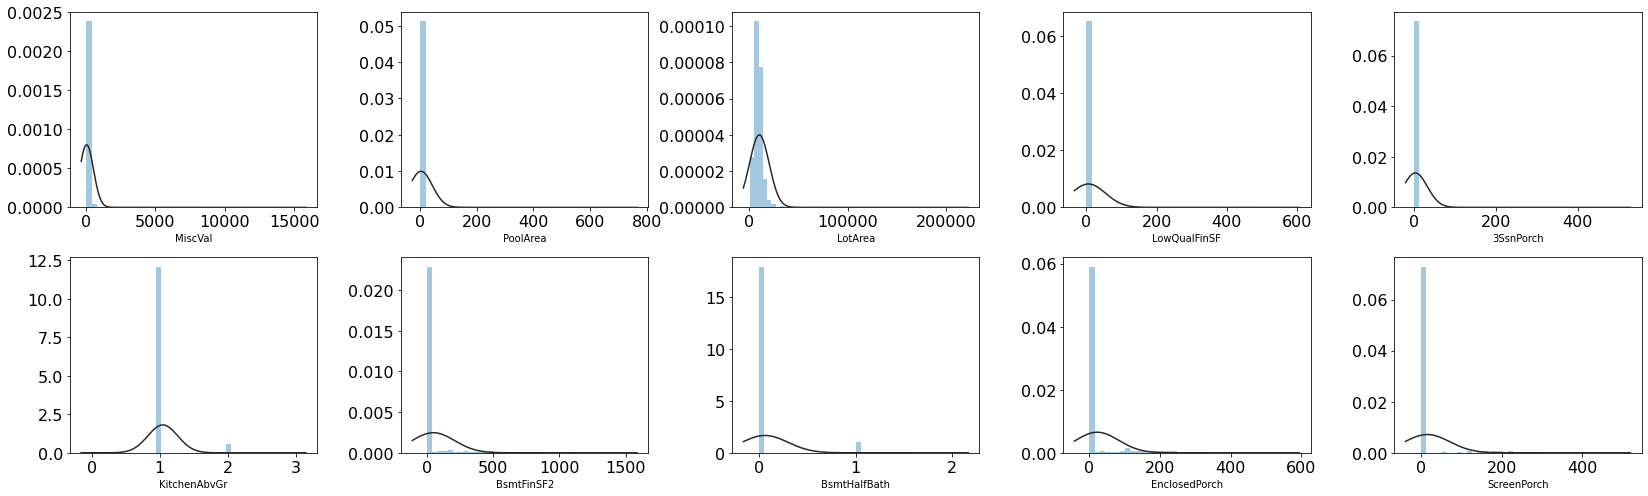

In [259]:
CategoryFeaturePlot(skewed_features)

Normalize skewed features with boxcox1p

In [260]:
from scipy.special import boxcox1p

skewness = skewness[abs(skewness) > 0.70]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
  
    housing[feat] = boxcox1p(housing[feat], lam)

#### Visualize the distributions after normalization

In [261]:
normalized_features = ['MiscVal','PoolArea','LotArea','LowQualFinSF','3SsnPorch','BsmtHalfBath','KitchenAbvGr','BsmtFinSF2','EnclosedPorch','ScreenPorch']

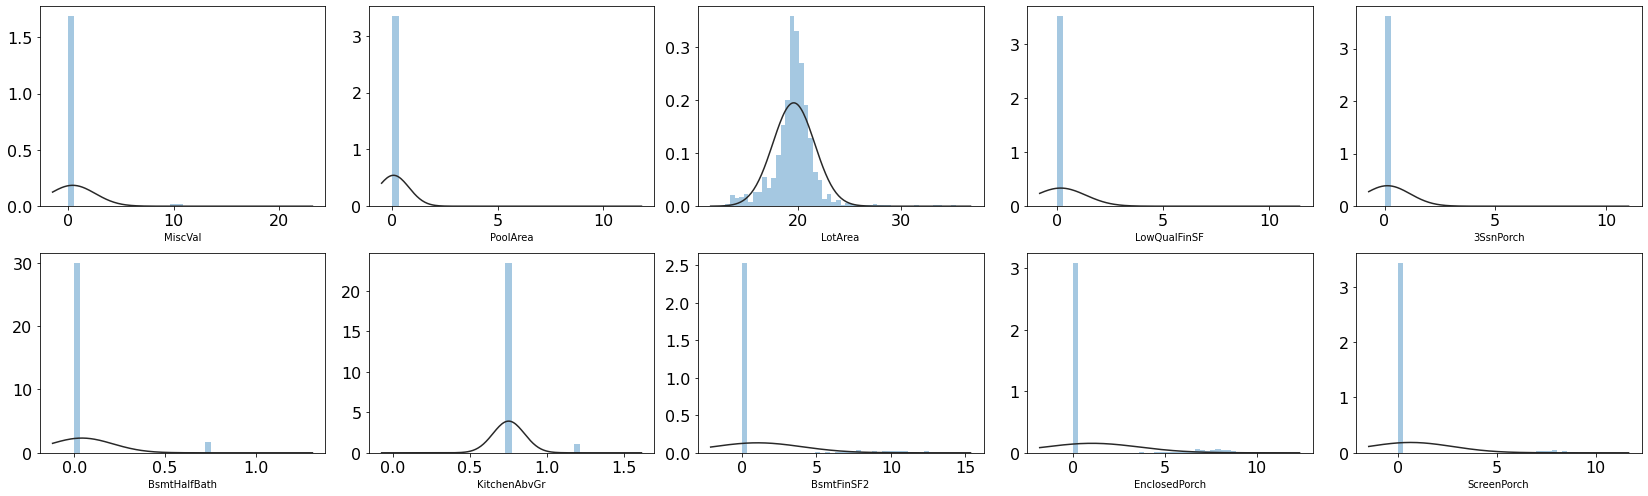

In [262]:
CategoryFeaturePlot(normalized_features)

### Check for Duplicates

In [263]:
# Check if there are any duplicate values in the dataset

housing[housing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old


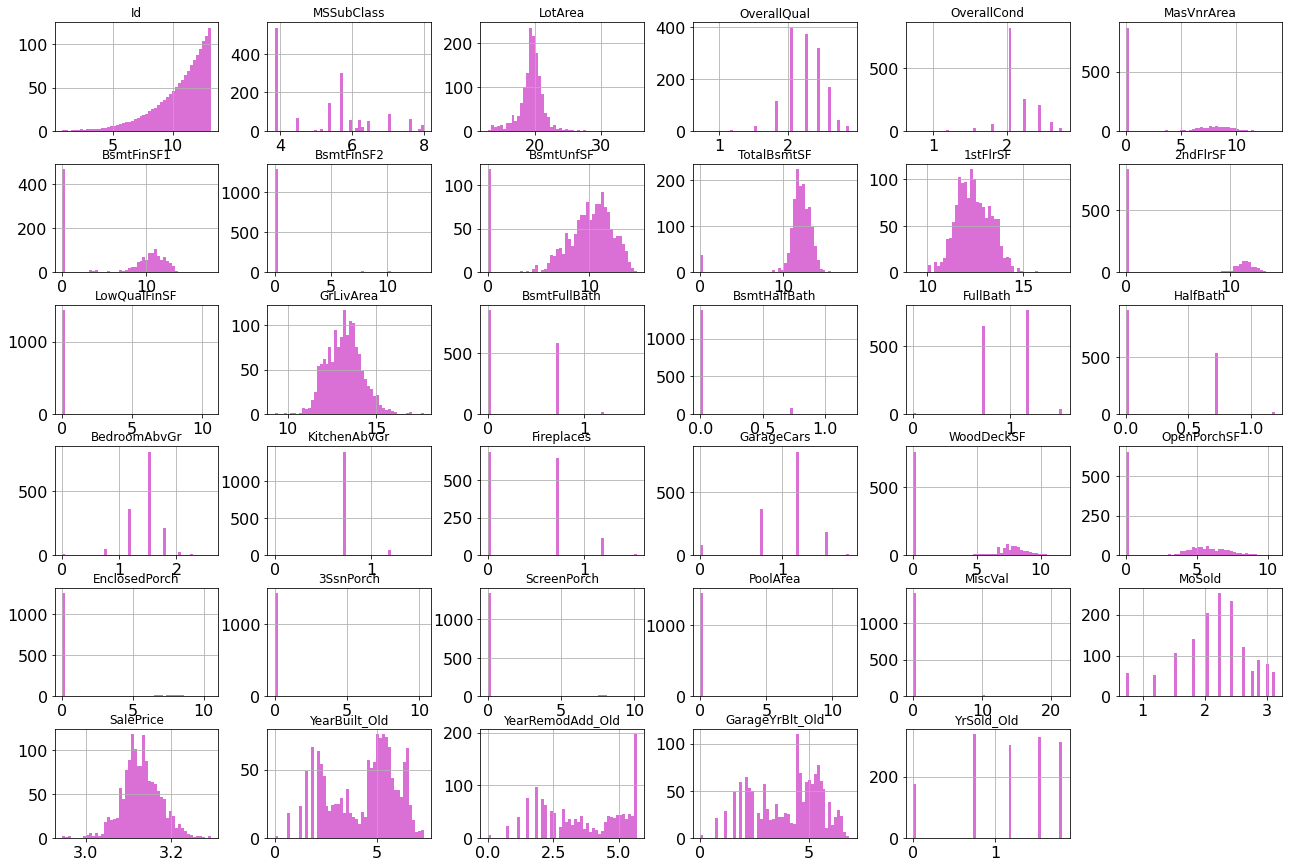

In [264]:
#Histogram for each numerical attribute
housing.hist(bins=50, figsize=(22,15), color='orchid')
plt.show()

In [265]:
# Checking outliers at 25%,50%,75%,90%,95% and above

round(housing.describe(percentiles=[.25,.5,.75,.90,.95,.99]),2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,10.64,5.22,19.56,2.26,2.16,3.27,7.08,1.05,9.39,11.89,12.43,4.92,0.16,13.19,0.31,0.04,0.99,0.28,1.47,0.75,0.42,1.06,3.73,3.25,1.04,0.13,0.62,0.05,0.40,2.23,3.13,4.33,3.66,4.06,1.16
std,2.25,1.24,2.05,0.27,0.22,4.13,5.14,3.00,3.39,2.16,0.91,5.67,1.19,0.99,0.37,0.17,0.25,0.36,0.28,0.10,0.42,0.36,3.98,3.11,2.59,1.02,2.13,0.73,2.15,0.55,0.05,1.66,1.51,1.51,0.58
min,0.73,3.86,12.88,0.73,0.73,0.00,0.00,0.00,0.00,0.00,9.28,0.00,0.00,9.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,2.94,0.00,0.00,0.00,0.00
25%,9.50,3.86,18.78,2.06,2.06,0.00,0.00,0.00,8.35,11.49,11.78,0.00,0.00,12.47,0.00,0.00,0.73,0.00,1.19,0.73,0.00,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.06,3.10,2.89,2.26,2.75,0.73
50%,11.26,5.36,19.66,2.26,2.06,0.00,9.61,0.00,10.16,12.10,12.36,0.00,0.00,13.23,0.00,0.00,1.19,0.00,1.54,0.73,0.73,1.19,0.00,4.20,0.00,0.00,0.00,0.00,0.00,2.26,3.13,4.84,3.53,4.49,1.19
75%,12.38,5.97,20.47,2.44,2.26,7.68,11.19,0.00,11.53,12.88,13.08,11.25,0.00,13.82,0.73,0.00,1.19,0.73,1.54,0.73,0.73,1.19,7.72,5.91,0.00,0.00,0.00,0.00,0.00,2.60,3.16,5.56,5.09,5.29,1.54
90%,12.91,7.02,21.36,2.60,2.44,9.29,12.30,6.97,12.72,13.50,13.64,11.99,0.00,14.42,0.73,0.00,1.19,0.73,1.82,0.73,0.73,1.54,8.71,7.18,6.88,0.00,0.00,0.00,0.00,2.89,3.19,6.34,5.68,5.74,1.82
95%,13.07,7.62,22.17,2.60,2.60,10.04,12.82,9.69,13.24,13.77,13.91,12.50,0.00,14.85,0.73,0.73,1.19,0.73,1.82,0.73,1.19,1.54,9.29,7.81,7.87,0.00,7.62,0.00,0.00,3.01,3.21,6.53,5.68,6.22,1.82
99%,13.19,7.99,25.70,2.89,2.75,11.48,13.44,11.61,13.85,14.42,14.51,13.14,9.46,15.62,1.19,0.73,1.54,0.73,2.06,1.19,1.19,1.54,10.30,8.91,8.70,7.72,8.76,0.00,11.15,3.13,3.24,6.86,5.68,6.51,1.82


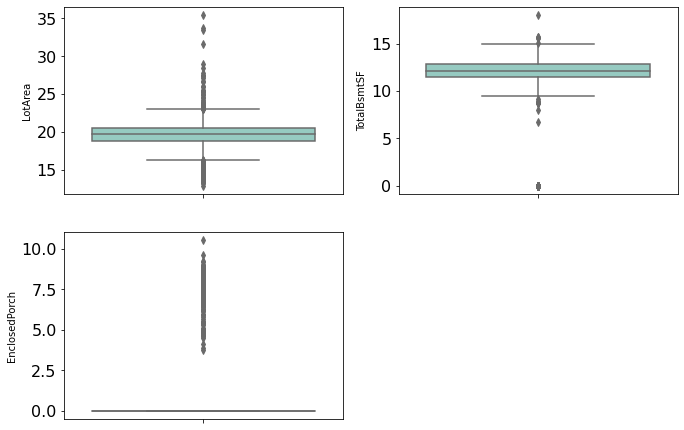

In [266]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = housing)


plt.show()

In [267]:
# Removing Outliers

# Removing values beyond 98% for LotArea
nn_quartile_LotArea = housing['LotArea'].quantile(0.98)
housing = housing[housing["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 99% for TotalBsmtSF
nn_quartile_TotalBsmtSF = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing['TotalBsmtSF'] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for EnclosedPorch
nn_quartile_EnclosedPorch = housing['EnclosedPorch'].quantile(0.99)
housing = housing[housing['EnclosedPorch'] < nn_quartile_EnclosedPorch]




In [268]:
# Determine the percentage of data retained

num_data = round(100*(len(housing)/1460),2)
print(num_data)

95.89


In [269]:
# Check the shape of the dataframe

housing.shape

(1400, 78)

In [270]:
# Converting non-numeric predictors stored as numbers into string

housing['MSSubClass'] = housing['MSSubClass'].apply(str)

housing['MoSold'] = housing['MoSold'].apply(str)

### Step 4: Data Preparation¶
Converting categorical data into numercal data
Creating Dummies

In [271]:
types_train = housing.dtypes
num_train = types_train[ (types_train=='int64') | (types_train=='float64')]
cat_train= types_train[ types_train=='object']


In [272]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     45
float64    33
Name: 0, dtype: int64

In [273]:
categorical_values_train = list(cat_train.index)
categorical_values_train


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [274]:
#Treating categorical variables:-
for i in categorical_values_train:
    feature_set = set(housing[i])
    for j in feature_set:
        feature_list = list(feature_set)
        housing.loc[housing[i] == j,i] = feature_list.index(j)

## Step 5: Train Test Split

In [275]:
# Putting all feature variable to X

X = housing.drop(['SalePrice','Id'], axis=1)
X.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,2,0,19.212182,1,0,0,1,0,1,0,17,2,1,3,4,2.440268,2.055642,0,5,5,6,1,8.059126,3,2,0,3,1,3,4,11.170327,2,0.0,7.483296,11.692623,0,1,0,2,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3,2,0.000000,5,0,3,1.194318,2,2,0,0.000000,5.714669,0.0,0.000000,0.0,0.0,1,4,3,0.000000,7,7,2,2.440268,2.440268,2.440268,1.194318
1,0,0,19.712205,1,0,0,1,0,4,0,10,8,1,3,2,2.259674,2.602594,0,5,10,11,2,0.000000,0,2,5,3,1,1,2,12.062832,2,0.0,8.897844,12.792276,0,1,0,2,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,0,2,0.730463,2,0,3,1.194318,2,2,0,9.010206,0.000000,0.0,0.000000,0.0,0.0,1,4,3,0.000000,10,7,2,4.697012,4.697012,4.697012,1.540963
2,2,0,20.347241,1,0,1,1,0,1,0,17,2,1,3,4,2.440268,2.055642,0,5,5,6,1,7.646538,3,2,0,3,1,0,4,10.200343,2,0.0,9.917060,11.892039,0,1,0,2,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3,2,0.730463,2,0,3,1.194318,2,2,0,0.000000,5.053371,0.0,0.000000,0.0,0.0,1,4,3,0.000000,0,7,2,2.750250,2.602594,2.750250,1.194318
4,2,0,21.325160,1,0,1,1,0,4,0,2,2,1,3,4,2.602594,2.055642,0,5,5,6,1,9.391827,3,2,0,3,1,2,4,10.971129,2,0.0,10.221051,12.510588,0,1,0,2,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,3,2,0.730463,2,0,3,1.540963,2,2,0,8.013884,6.314735,0.0,0.000000,0.0,0.0,1,4,3,0.000000,3,7,2,2.885846,2.885846,2.885846,1.194318
5,12,0,21.282283,1,0,1,1,0,1,0,12,2,1,3,0,2.055642,2.055642,0,5,5,6,2,0.000000,0,2,2,3,1,3,4,11.267217,2,0.0,5.802739,11.493820,0,1,0,2,11.493820,10.589574,0.0,13.015963,0.730463,0.000000,0.730463,0.730463,0.730463,0.730463,0,2,0.000000,5,0,0,1.194318,2,2,0,4.969939,4.492018,0.0,9.178051,0.0,0.0,1,2,1,11.147538,11,7,2,3.618223,3.438110,3.618223,0.730463


In [276]:
# Putting response variable to y

y = housing['SalePrice']
y.head()

0    3.156009
1    3.140516
2    3.163719
4    3.176081
5    3.113553
Name: SalePrice, dtype: float64

In [277]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
   

In [278]:
# split into train and test

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [279]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1237,0.007862,-0.490100,1.103722,0.053529,-0.244376,0.954628,-0.203495,-0.026736,1.672874,-0.20197,-1.263782,-0.343351,-0.082173,0.117220,-1.053615,-0.739039,1.256710,1.271537,0.103036,-1.625459,0.531606,-1.248990,0.770315,-0.765017,-0.136286,-1.061771,-0.461710,-0.172872,-0.497052,0.824150,1.012492,-0.164257,-0.343434,-0.609151,0.319043,-0.137349,0.504464,-0.258985,0.076194,0.166666,-0.865898,-0.132724,-0.643634,1.170620,-0.238331,-1.012152,-0.768055,0.260258,-0.209521,-0.946731,-0.214936,0.769678,-0.475458,-0.772943,1.239268,0.402887,-0.034504,-0.070224,-0.283230,1.193752,-1.045736,-0.388602,-0.130656,-0.289915,-0.053502,0.0,0.4571,0.184106,-0.18548,-1.372043,0.309728,0.290453,0.542771,1.030196,0.775222,-2.003345
993,-0.872677,-0.490100,-0.188504,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,-0.420087,-0.20197,0.517433,-0.343351,-0.082173,0.117220,-0.354203,0.716397,-0.473876,-0.422233,0.103036,-0.275330,-0.040013,2.031660,1.414695,1.358626,-0.136286,-1.061771,0.846779,-0.172872,0.536934,0.824150,0.997113,-0.164257,-0.343434,0.485661,0.812007,-0.137349,-0.743327,-0.258985,0.076194,1.395991,-0.865898,-0.132724,0.473244,1.170620,-0.238331,0.834510,-0.768055,0.260258,-0.209521,1.148248,-0.214936,-0.991397,0.946851,-0.772943,-1.090600,1.362246,-0.034504,-0.070224,-0.283230,-0.928495,1.302989,-0.388602,-0.130656,-0.289915,-0.053502,0.0,0.4571,0.184106,-0.18548,0.298270,0.309728,0.290453,-1.035137,-0.702275,-0.956660,1.158846
425,1.768940,2.176249,-0.769524,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,-0.420087,-0.20197,-0.304666,-0.343351,-0.082173,0.117220,-1.753028,-0.739039,1.256710,-0.422233,0.103036,1.412332,1.389035,0.391335,-0.790114,-0.765017,-0.136286,-1.061771,-0.461710,-0.172872,0.536934,-1.028864,-1.360117,-0.164257,-0.343434,0.873230,0.231438,-0.137349,0.504464,-0.258985,0.076194,0.097153,0.899386,-0.132724,0.314535,-0.820943,-0.238331,0.834510,-0.768055,0.260258,-0.209521,-0.946731,-0.214936,0.769678,-0.475458,1.004911,-1.090600,0.402887,-0.034504,-0.070224,1.760698,-0.928495,-1.045736,-0.388602,-0.130656,-0.289915,-0.053502,0.0,0.4571,0.184106,-0.18548,0.855041,0.309728,0.290453,1.154059,0.027978,1.446159,0.071362
1195,0.007862,-0.490100,0.730888,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,-0.420087,-0.20197,-0.715716,-0.343351,-0.082173,0.117220,-1.053615,0.033024,1.256710,1.271537,0.103036,-0.275330,-0.040013,-1.248990,0.699947,-0.765017,-0.136286,1.055721,0.846779,-0.172872,0.536934,-1.028864,-1.360117,-0.164257,-0.343434,0.383085,-0.535166,-0.137349,-0.743327,-0.258985,0.076194,0.132065,1.124609,-0.132724,0.862833,-0.820943,-0.238331,2.214548,1.254587,0.260258,-0.209521,-0.946731,-0.214936,0.769678,-1.186612,2.190148,0.462645,0.402887,-0.034504,-0.070224,-0.283230,1.289428,1.174846,-0.388602,-0.130656,3.222692,-0.053502,0.0,0.4571,0.184106,-0.18548,-0.258501,0.309728,-2.898838,-0.030526,-0.810099,0.145982,0.673536
236,0.668266,-0.490100,0.456015,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,1.672874,-0.20197,1.476549,-0.343351,-0.082173,1.680149,1.044623,0.033024,0.444145,-0.422233,0.103036,-0.950395,-0.897442,0.391335,-0.790114,-0.765017,-0.136286,1.055721,0.846779,-0.172872,0.536934,-1.0

In [280]:
X_test.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
665,0.448131,2.176249,-1.491903,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,-0.420087,-0.20197,0.517433,-0.343351,-0.082173,1.680149,-0.354203,0.033024,-0.473876,-0.422233,0.103036,-0.275330,-0.040013,-1.248990,1.035452,1.358626,-0.136286,-1.061771,0.846779,-0.172872,-1.531038,0.824150,0.811895,-0.164257,-0.343434,-0.553537,-0.078003,-0.137349,-0.743327,-0.258985,0.076194,-0.823464,-0.865898,-0.132724,-1.543198,1.170620,-0.238331,-1.012152,-0.768055,-2.715672,-0.209521,1.148248,-0.214936,0.769678,-1.186612,-0.772943,1.239268,0.402887,-0.034504,-0.070224,-0.28323,0.961851,-1.045736,-0.388602,-0.130656,-0.289915,-0.053502,0.0,0.45710,0.184106,-0.185480,1.133427,0.309728,0.290453,-1.242597,-0.930057,-1.184364,0.071362
624,-0.432408,-0.490100,-0.308634,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,-0.420087,-0.20197,-1.263782,1.613329,-0.082173,0.117220,1.044623,0.033024,-0.473876,-0.422233,0.103036,1.412332,1.389035,-1.248990,1.515820,-0.765017,-0.136286,1.055721,-0.461710,-0.172872,0.536934,-1.028864,-1.360117,-0.164257,-0.343434,0.583211,-0.222161,-0.137349,0.504464,-0.258985,0.076194,-0.134688,1.162439,-0.132724,0.812333,-0.820943,-0.238331,-1.012152,1.254587,1.286032,-0.209521,-0.946731,-0.214936,0.769678,-1.186612,-0.772943,-1.090600,0.402887,-0.034504,-0.070224,-0.28323,-0.928495,1.241536,2.965553,-0.130656,-0.289915,-0.053502,0.0,0.45710,0.184106,-0.185480,0.855041,0.309728,0.290453,0.496053,0.978902,0.723945,-2.003345
115,-0.432408,-0.490100,0.786702,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,1.672874,-0.20197,1.476549,-0.343351,-0.082173,0.117220,1.044623,0.716397,-0.473876,1.271537,0.103036,-0.950395,-0.897442,0.391335,-0.790114,-0.765017,-0.136286,-1.061771,0.846779,-0.172872,-2.565024,0.824150,1.222715,-0.164257,-0.343434,-0.365157,0.828016,-0.137349,1.752256,-0.258985,0.076194,1.489922,1.495358,-0.132724,2.698577,1.170620,-0.238331,2.214548,-0.768055,2.150015,-0.209521,1.148248,-0.214936,1.887986,-1.186612,-0.772943,-1.090600,1.362246,-0.034504,-0.070224,-0.28323,1.477375,-1.045736,-0.388602,-0.130656,-0.289915,-0.053502,0.0,0.45710,0.184106,-0.185480,1.133427,0.309728,0.290453,-0.275152,0.132153,-0.122516,-2.003345
478,-0.872677,-0.490100,-0.356795,0.053529,-0.244376,0.954628,-0.203495,-0.026736,-0.420087,-0.20197,-1.263782,-0.343351,-0.082173,0.117220,-0.354203,-0.739039,1.256710,-0.422233,0.103036,1.412332,1.389035,0.391335,-0.790114,-0.765017,-0.136286,1.055721,-0.461710,-0.172872,0.536934,1.441821,-0.021513,-2.386094,2.680405,0.296622,0.014635,-0.137349,-1.991119,-0.258985,0.076194,-0.592450,-0.865898,-0.132724,-1.333314,-0.820943,4.079809,-1.012152,-0.768055,-1.012527,-0.209521,-0.946731,-0.214936,-0.991397,0.946851,-0.772943,0.462645,-0.880855,-0.034504,-0.070224,-0.28323,-0.136783,1.828268,-0.388602,-0.130656,-0.289915,-0.053502,0.0,-4.06544,-5.130307,4.559934,0.855041,0.309728,0.290453,0.673442,0.359758,0.918643,0.673536
233,-0.872677,0.398683,0.042885,0.053529,-0.244376,-0.647865,-0.203495,-0.026736,-0.420087,-0.20197,1.339533,-0.343351,-0.082173,0.117220,-0.354203,1.330643,-0.473876,-0.422233,0.103036,-0.275330,-0.040013,2.031660,0.385619,1.358626,-0.136286,-1.061771,0.846779,-0.172872

In [281]:
y_train.head()

1290    3.139896
1033    3.166890
442     3.128340
1245    3.138329
243     3.093449
Name: SalePrice, dtype: float64

In [282]:
y_test.head()

690    3.111947
648    3.122713
118    3.203011
499    3.093449
240    3.181437
Name: SalePrice, dtype: float64

In [283]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [284]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

3.128578347012841
[-6.56408986e-04 -2.85997952e-03  3.85383804e-03  1.24074037e-03
 -2.76822632e-04  2.89682265e-04  5.68023844e-04 -1.31510859e-03
 -4.78221536e-05 -9.52641016e-05 -4.79857263e-04 -7.48497257e-04
 -2.58823640e-04  9.73152140e-04  1.68316844e-04  8.41368837e-03
  6.04031177e-03  4.45156949e-04  1.14511935e-03  2.49613982e-03
 -1.41091970e-03  1.64861995e-03  8.26927848e-04  1.49136975e-03
 -3.36675291e-04 -1.41370703e-03 -7.14729419e-04  3.13089912e-03
 -5.95338662e-04  2.98610901e-04  2.96208084e-03 -9.34104610e-05
 -5.31924683e-04 -1.40849448e-03  5.58507109e-03 -4.83132567e-04
 -5.83552744e-04 -1.35699637e-03  3.98259187e-04  1.13367889e-03
 -1.75900762e-03 -3.40408523e-04  1.71680041e-02  1.71548912e-03
  2.05432725e-07  8.98960963e-04  1.37328609e-03 -1.65226064e-03
 -9.07297590e-04  5.93782116e-04 -1.34048676e-03  1.38857420e-03
 -5.83334960e-04 -2.41022249e-04 -2.82784094e-04  3.58389236e-03
 -3.04759908e-05 -1.65363445e-04 -7.43038574e-04  1.09217474e-03
  1.188

In [285]:
from sklearn.metrics import r2_score, mean_squared_error

In [286]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9109605569300255
0.9129514223888275
0.16781710849762915
0.06895211556326544
0.00017141686261249147
0.0001641717037220606


## Ridge and Lasso Regression

### Ridge Regression

In [287]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [288]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 50}


In [289]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-8.42822502e-04 -2.72270271e-03  3.73834938e-03  1.29199260e-03
 -2.98487563e-04  4.46330987e-04  6.30218953e-04  1.11904098e-33
 -1.11674213e-04 -6.85362139e-05 -3.18891194e-04 -7.28323288e-04
 -2.78345598e-04  1.01224404e-03  4.91630121e-04  8.27583879e-03
  5.37960745e-03  6.94340963e-04  1.01000304e-03  2.07589727e-03
 -9.86579048e-04  1.58724213e-03  1.09066906e-03  1.76388190e-03
 -2.42810841e-04 -1.62010121e-03 -7.09174924e-04  2.52164567e-03
 -7.80882515e-04  3.72427552e-04  3.05819624e-03 -3.72093530e-04
 -3.27994872e-04 -8.81373692e-04  4.47385111e-03 -4.98985928e-04
 -6.74158843e-04 -1.61610023e-03  3.91810931e-04  5.63688154e-03
  2.66708631e-03  2.69488943e-04  1.00312431e-02  1.79702801e-03
  1.21199357e-05  1.50783560e-03  1.84667735e-03 -8.31770682e-04
 -6.28132671e-04  7.62965441e-04 -1.21433227e-03  1.51689481e-03
 -8.25817886e-04 -1.61524564e-04  4.16125177e-06  3.76882427e-03
 -4.11092423e-05 -5.32691892e-05 -9.55182315e-04  1.07035974e-03
  3.99020758e-04  4.59476

In [290]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9096434236490945
0.9164132975997556
0.1702995757176693
0.0662099269352587
0.00017395257989547425
0.0001576426831791874


In [291]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).head(11)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,50,-0.009264,-0.010238,1
25,100,-0.009370,-0.010242,2
23,20,-0.009206,-0.010284,3
22,10.0,-0.009189,-0.010316,4
21,9.0,-0.009187,-0.010320,5
20,8.0,-0.009186,-0.010325,6
19,7.0,-0.009184,-0.010330,7
18,6.0,-0.009183,-0.010335,8
17,5.0,-0.009182,-0.010342,9
16,4.0,-0.009182,-0.010350,10


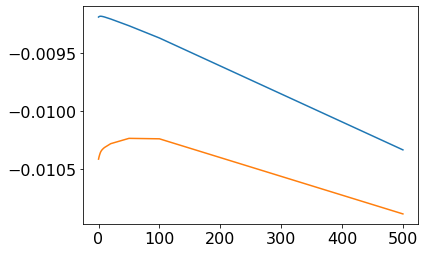

In [292]:
# plotting mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

### Lasso

In [293]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [294]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [295]:
#Fitting lasso model for alpha  and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [296]:
lasso.coef_

array([-5.84678766e-04, -2.83729298e-03,  3.70859252e-03,  1.26067083e-03,
       -1.73330981e-04,  2.89073942e-04,  4.25919584e-04,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.59866767e-04, -7.24717633e-04,
       -1.46911170e-04,  8.97368767e-04,  1.80792094e-04,  8.71277742e-03,
        5.95425421e-03,  3.50208402e-04,  8.48420441e-04,  1.92239024e-03,
       -8.11063610e-04,  1.35638160e-03,  6.48320616e-04,  1.47322373e-03,
       -1.51672571e-04, -1.31877717e-03, -5.82163019e-04,  2.57790722e-03,
       -5.92405865e-04,  1.57327315e-04,  3.43510358e-03, -5.65206479e-05,
       -2.12901583e-04, -7.67744964e-04,  4.58672202e-03, -4.28217264e-04,
       -4.77068476e-04, -1.29620116e-03,  3.08827447e-04,  2.83986469e-03,
       -0.00000000e+00, -9.26898456e-05,  1.51183860e-02,  1.66270469e-03,
       -0.00000000e+00,  4.73262536e-04,  1.12730463e-03, -1.28412619e-03,
       -8.13469201e-04,  5.87641295e-04, -1.25389675e-03,  1.48967903e-03,
       -5.73439470e-04, -

In [297]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).head(11)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.009225,-0.010238,1
1,0.001,-0.009831,-0.010314,2
2,0.01,-0.016611,-0.016687,3
25,100,-0.034118,-0.034143,4
24,50,-0.034118,-0.034143,4
23,20,-0.034118,-0.034143,4
22,10.0,-0.034118,-0.034143,4
21,9.0,-0.034118,-0.034143,4
20,8.0,-0.034118,-0.034143,4
19,7.0,-0.034118,-0.034143,4


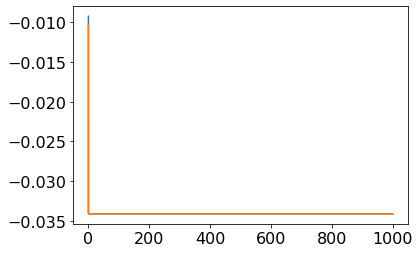

In [298]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])


plt.show()

In [299]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9104086819635309
0.916633543489214
0.16885725495335857
0.06603546779486813
0.00017247932068780242
0.00015722730427349555


In [300]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.910961,0.909643,0.910409
1,R2 Score (Test),0.912951,0.916413,0.916634
2,RSS (Train),0.167817,0.170300,0.168857
3,RSS (Test),0.068952,0.066210,0.066035
4,MSE (Train),0.013093,0.013189,0.013133
5,MSE (Test),0.012813,0.012556,0.012539


Lets observe the changes in the coefficients after regularization

In [301]:
betas = pd.DataFrame(index=X.columns)

In [302]:
betas.rows = X.columns

In [303]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [304]:
betas['Ridge'] = ridge.coef_
betas['Ridge'].sort_values(ascending = False).head(10)

GrLivArea      0.010031
OverallQual    0.008276
1stFlrSF       0.005637
OverallCond    0.005380
TotalBsmtSF    0.004474
GarageCars     0.003769
LotArea        0.003738
BsmtFinSF1     0.003058
2ndFlrSF       0.002667
BsmtCond       0.002522
Name: Ridge, dtype: float64

In [305]:
betas['Lasso'] = lasso.coef_
betas['Lasso'].sort_values(ascending = False).head(10)

GrLivArea        0.015118
OverallQual      0.008713
OverallCond      0.005954
TotalBsmtSF      0.004587
GarageCars       0.003772
LotArea          0.003709
BsmtFinSF1       0.003435
1stFlrSF         0.002840
BsmtCond         0.002578
SaleCondition    0.002153
Name: Lasso, dtype: float64

In [306]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-6.564090e-04,-8.428225e-04,-0.000585
MSZoning,-2.859980e-03,-2.722703e-03,-0.002837
LotArea,3.853838e-03,3.738349e-03,0.003709
Street,1.240740e-03,1.291993e-03,0.001261
Alley,-2.768226e-04,-2.984876e-04,-0.000173
LotShape,2.896823e-04,4.463310e-04,0.000289
LandContour,5.680238e-04,6.302190e-04,0.000426
Utilities,-1.315109e-03,1.119041e-33,0.000000
LotConfig,-4.782215e-05,-1.116742e-04,-0.000000
LandSlope,-9.526410e-05,-6.853621e-05,-0.000000


### Inferences

we have done Linear, Ridge and Lasso Regression on the dataset and compared different regression models.
we have concluded top 10 variables which manupulates the price of houses and can be used to the best for our business purpose
              
          so the predictor variables we got from Ridge Regularization :
              1.GrLivArea      
              2.OverallQual    
              3.1stFlrSF       
              4.OverallCond    
              5.LotArea        
              6.GarageCars     
              7.BsmtFinSF1     
              8.TotalBsmtSF    
              9.Fireplaces     
              10.Functional     
            
         The predictor variables from Lasso Regularization :
             
                1.GrLivArea       
                2.OverallQual     
                3.OverallCond     
                4.1stFlrSF       
                5.LotArea         
                6.BsmtFinSF1      
                7.GarageCars      
                8.Fireplaces      
                9.Functional      
                10.BsmtFullBath    
           

The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 50
Lasso - 0.0001


The final model I would choose is that of lasso as the test results got better with lasso and moreover it helps with feature selections and converts non essential columns to zero.

So the company should focus on the lass generated predictor variables to archive its objective of investment.

## Assignment questions

In [307]:
#lets make the alpha double and compare the outcome for Ridge
#alpha = 100
#ridge = Ridge(alpha=alpha)

#ridge.fit(X_train, y_train)
#y_pred_ridge_train=ridge.predict(X_train)
#print(round(r2_score(y_train,y_pred_ridge_train),2))
#y_pred_ridge_test=ridge.predict(X_test)
#print(round(r2_score(y_test,y_pred_ridge_test),2))

In [308]:
#model_parameters = list(ridge.coef_)
#model_parameters.insert(0, ridge.intercept_)
#model_parameters = [round(x, 3) for x in model_parameters]
#cols = X.columns
#cols = cols.insert(0, "constant")
#var_coeff = list(zip(cols, model_parameters))
#var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
#df3 = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
#df3['B-Coeff']=df3['B-Coeff'].abs()
#df3=df3.sort_values(by=['B-Coeff'],ascending=False)
#df3

In [309]:
#print('Top 5 Predictor Variables using Ridge after Doubling the Alpha :',df3[1:6].values)

In [310]:
#for Lasso doubling the value of alpha
#alpha = 0.0002
#lasso = Lasso(alpha=alpha)
#lasso.fit(X_train, y_train) 
#y_pred_lasso_train=lasso.predict(X_train)
#print(round(r2_score(y_train,y_pred_lasso_train),2))
#y_pred_lasso_test=lasso.predict(X_test)
#print(round(r2_score(y_test,y_pred_lasso_test),2))

In [311]:
#model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
#model_parameters = [round(x, 3) for x in model_parameters]
#cols = X.columns
#cols = cols.insert(0, "constant")
#var_coeff = list(zip(cols, model_parameters))
#var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
#df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
#df['B-Coeff']=df['B-Coeff'].abs()
#df=df.sort_values(by=['B-Coeff'],ascending=False)
#print('Top 5 Predictor Variables using Lasso after Doubling the Alpha :',df[1:6].values)


In [312]:
#question3

In [313]:
#X_train=X_train.drop(['GrLivArea' ,'YearBuilt_Old', 'OverallQual','BsmtFinSF1','OverallCond' ],axis=1)
#X_test=X_test.drop(['GrLivArea' , 'YearBuilt_Old', 'OverallQual', 'BsmtFinSF1','OverallCond'],axis=1)

In [314]:
#lasso = Lasso()
# cross validation
#model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

#model_cv.fit(X_train, y_train) 

IndentationError: unexpected indent (<ipython-input-314-f1d0596df85e>, line 4)

In [ ]:
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

In [ ]:
#model_cv.best_params_

In [ ]:
#alpha = 0.0001
#lasso = Lasso(alpha=alpha)
#lasso.fit(X_train, y_train) 
#y_pred_lasso_train=lasso.predict(X_train)
#print('Train R2 Square : ',round(r2_score(y_train,y_pred_lasso_train),2))
#y_pred_lasso_test=lasso.predict(X_test)
#print('Test R2 Square : ',round(r2_score(y_test,y_pred_lasso_test),2))

In [ ]:
#model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
#model_parameters = [round(x, 3) for x in model_parameters]
#cols = X.columns
#cols = cols.insert(0, "constant")
#var_coeff = list(zip(cols, model_parameters))
#var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
#df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
#df['B-Coeff']=df['B-Coeff'].abs()
#df=df.sort_values(by=['B-Coeff'],ascending=False)

In [ ]:
#print('Top 5 Predictor Variables using Lasso after Droping 5 Important Predictor Variables :',df[1:6].values)